In [74]:
import os
from pathlib import Path
import pickle
import numpy as np
import pandas as pd

In [75]:
def load_data(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [76]:
data_root = r"C:/Users/hayashi/doutorado/mac6958--dados-redes/webrtc"
processed_file = Path(data_root, 'data/processed/facial-1001.pkl')

In [77]:
data = load_data(processed_file)

In [78]:
len(data)

300

In [79]:
data[0]['features'].shape

(3676, 323)

In [ ]:
# prepare the dataset


In [80]:
X = np.concatenate([d['features'] for d in data[:10]], axis=0)

In [81]:
X.shape

(33192, 323)

In [82]:
data[0]

{'user_id': 1,
 'test_condition': 10,
 'delay': 1000,
 'jitter': 500,
 'packet_loss_rate': 15,
 'features': array([[ 0.200067, -0.033075, -0.979224, ...,  1.      ,  0.      ,
          0.      ],
        [ 0.203814, -0.040347, -0.978178, ...,  1.      ,  0.      ,
          0.      ],
        [ 0.203665, -0.042064, -0.978137, ...,  0.      ,  0.      ,
          0.      ],
        ...,
        [-0.020206,  0.302458, -0.952948, ...,  0.      ,  0.      ,
          0.      ],
        [-0.015582,  0.300056, -0.953794, ...,  0.      ,  0.      ,
          0.      ],
        [-0.021239,  0.304443, -0.952294, ...,  1.      ,  0.      ,
          0.      ]])}

In [83]:
Y = [np.tile(
        np.array([[d['delay'], d['jitter'], d['packet_loss_rate']]]),
        (d['features'].shape[0], 1)
      ) for d in data[:10]]

In [84]:
Y = np.concatenate(Y, axis=0)

In [85]:
Y.shape

(33192, 3)

In [86]:
np.concatenate(Y, axis=0)

array([1000,  500,   15, ...,  500,  500,    0])

In [87]:
data[0]['features'].shape[0]

3676

In [89]:
delay_values = {d['delay'] for d in data}
delay_values

{0, 500, 1000}

In [91]:
jitter_values = {d['jitter'] for d in data}
jitter_values

{0, 500}

In [90]:
packet_loss_values = {d['packet_loss_rate'] for d in data}
packet_loss_values

{0, 15, 30}

In [57]:
len(data)

300

In [93]:
max_delay = max(delay_values)
max_delay

1000

In [96]:
{d/max_delay for d in delay_values}

{0.0, 0.5, 1.0}

In [97]:
max_jitter = max(jitter_values)
max_jitter

500

In [98]:
max_package_loss = max(packet_loss_values)
max_package_loss

30

In [104]:
set(y[0] for y in Y)

{0, 500, 1000}

In [105]:
Y[0]

array([1000,  500,   15])

In [109]:
newY= Y / [max_delay, max_jitter, max_package_loss]

In [112]:
set(d[2] for d in newY)

{0.0, 0.5, 1.0}

In [113]:
Y = newY

In [114]:
X.shape, Y.shape

((33192, 323), (33192, 3))

In [115]:
X[0:10]

array([[ 0.200067, -0.033075, -0.979224, ...,  1.      ,  0.      ,
         0.      ],
       [ 0.203814, -0.040347, -0.978178, ...,  1.      ,  0.      ,
         0.      ],
       [ 0.203665, -0.042064, -0.978137, ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.201516, -0.06901 , -0.977051, ...,  0.      ,  0.      ,
         0.      ],
       [ 0.201563, -0.060318, -0.977617, ...,  0.      ,  0.      ,
         0.      ],
       [ 0.206322, -0.057248, -0.976808, ...,  0.      ,  0.      ,
         0.      ]])

In [116]:
Y[0:10]

array([[1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [1. , 1. , 0.5]])

In [117]:
import numpy as np
import tensorflow as tf


ModuleNotFoundError: No module named 'tensorflow'

In [118]:
!pip install tensorflow

You should consider upgrading via the 'C:\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached werkzeug-3.0.2-py3-none-any.whl (226 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.26.1
    Uninstalling protobuf-5.26.1:
      Successfully uninstalled protobuf-5.26.1


In [120]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [121]:
from sklearn.model_selection import train_test_split


In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [123]:
# Assuming X and Y are already defined as numpy arrays
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [124]:
model = Sequential([
    Dense(128, input_shape=(323,), activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='sigmoid')  # 'sigmoid' because each output ranges from 0 to 1
])

C:\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [125]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])

In [126]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1617 - mean_squared_error: 0.1617 - val_loss: 0.2035 - val_mean_squared_error: 0.2035
Epoch 2/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1364 - mean_squared_error: 0.1364 - val_loss: 0.2694 - val_mean_squared_error: 0.2694
Epoch 3/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1328 - mean_squared_error: 0.1328 - val_loss: 0.3585 - val_mean_squared_error: 0.3585
Epoch 4/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1254 - mean_squared_error: 0.1254 - val_loss: 0.1663 - val_mean_squared_error: 0.1663
Epoch 5/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1187 - mean_squared_error: 0.1187 - val_loss: 0.3124 - val_mean_squared_error: 0.3124
Epoch 6/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.2743 - val_mean_squared_error: 0.2743
Epoch 7/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.28

In [127]:
test_loss, test_mse = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test MSE: {test_mse}")

Test MSE: 0.17106100916862488


In [128]:
predictions = model.predict(X_test[:10])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[3.3642057e-01 3.1903218e-02 6.7078418e-01]
 [9.3170655e-01 9.8584187e-01 8.7699987e-02]
 [1.3257490e-01 5.9828453e-02 6.3052237e-02]
 [3.4202716e-01 8.1390399e-01 3.1083746e-02]
 [5.8256340e-01 9.5408714e-01 5.8451641e-01]
 [4.3922824e-01 5.7702982e-01 9.2631765e-02]
 [2.0905313e-01 9.9728131e-01 2.1331482e-04]
 [3.4316948e-01 3.4979478e-02 9.9966085e-01]
 [3.5069615e-01 4.5490820e-02 9.4565696e-01]
 [1.6540323e-01 3.1835377e-01 8.0726397e-01]]


In [129]:
pip install matplotlib

You should consider upgrading via the 'C:\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [130]:
import matplotlib.pyplot as plt

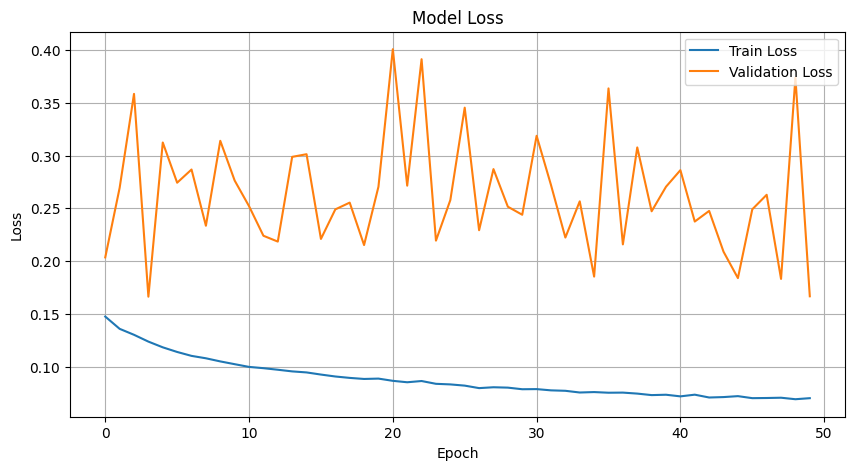

In [131]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

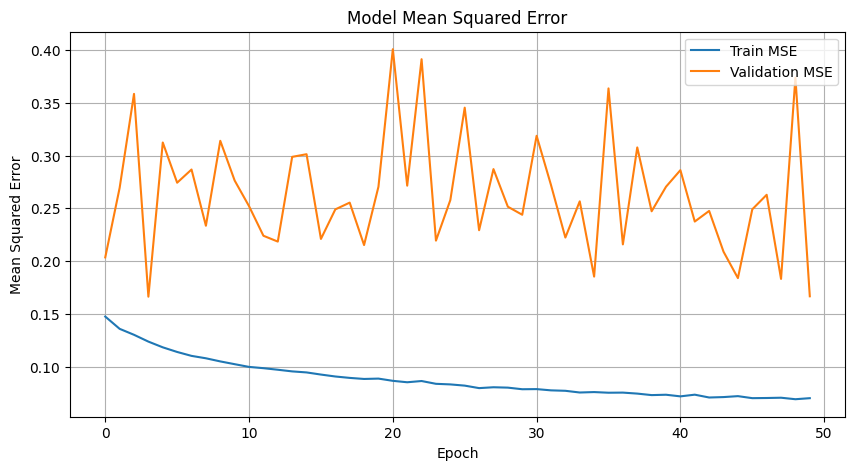

In [132]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [133]:
from tensorflow.keras.layers import Dropout

In [134]:
model = Sequential([
    Dense(128, input_shape=(323,), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Dropout at 30%
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),  # Dropout at 20%
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),  # Dropout at 10%
    Dense(3, activation='sigmoid')
])

C:\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [135]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1887 - mean_squared_error: 0.1887 - val_loss: 0.1739 - val_mean_squared_error: 0.1739
Epoch 2/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1572 - mean_squared_error: 0.1572 - val_loss: 0.2800 - val_mean_squared_error: 0.2800
Epoch 3/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1519 - mean_squared_error: 0.1519 - val_loss: 0.1617 - val_mean_squared_error: 0.1617
Epoch 4/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1480 - mean_squared_error: 0.1480 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 5/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1448 - mean_squared_error: 0.1448 - val_loss: 0.1555 - val_mean_squared_error: 0.1555
Epoch 6/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1426 - mean_squared_error: 0.1426 - val_loss: 0.1483 - val_mean_squared_error: 0.1483
Epoch 7/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1422 - mean_squared_error: 0.1422 - val_loss: 0.17

Test MSE: 0.25869086384773254


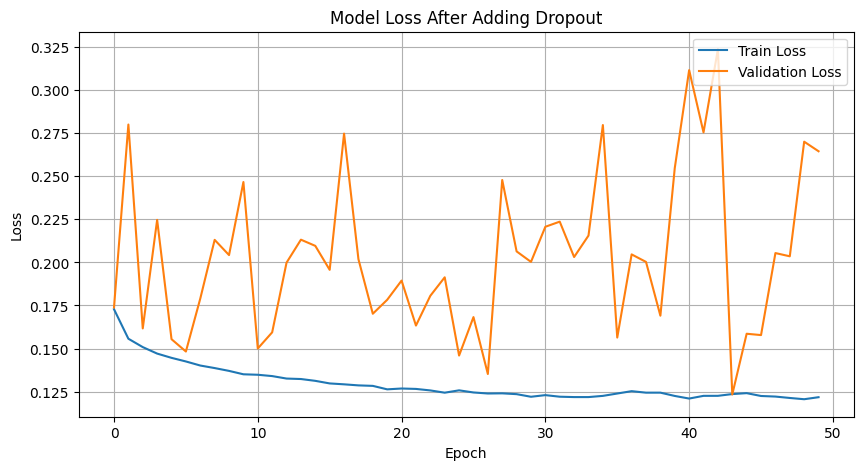

In [136]:
test_loss, test_mse = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test MSE: {test_mse}")

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss After Adding Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()